# first we are importing the modules and libraries neccessary for running the **dynamic** python code



In [ ]:
import pandas as pd
!pip install ctrl4ai
from ctrl4ai import preprocessing
from ctrl4ai import automl
from ctrl4ai import datasets
from ctrl4ai import helper
import numpy as np


In [ ]:
dataset = pd.read_csv('titanic.csv')

In [ ]:
y = dataset['Survived']

KeyError: ignored

In [ ]:
len(y.index)

891

In [ ]:
dataset = dataset.drop('Survived', axis=1)

In [ ]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



# here we are declaring for the x and y which our client will give to us

# **droping the single valued columns**

In [ ]:
#for droping the single valued columns
#it checks for the single valued column and store as list in e........
from ctrl4ai import helper
single_valued_column = [ i for i in dataset.columns
            if helper.single_valued_col(dataset[i]) == True ]
# the columns stored in e is then removed from the dataset columns using loop
for e in single_valued_column:
    DataFrame.drop(labels=single_valued_column[e], axis=1)  
# single valued columns are removed from the dataset...............

# **Dropping non-categorical non-numeric columns**

In [ ]:
# list of item which are categorical variable in our dataset
from ctrl4ai import helper
categorical_variable = [ i for i in dataset.columns
            if helper.check_categorical_col(dataset[i]) == True ]

In [ ]:
t = preprocessing.drop_non_numeric(dataset)
li1 = dataset.columns
li2 = t.columns
temp3 = [item for item in li1 if item not in li2]
li3 = categorical_variable
li4 = temp3
temp4 =  [item for item in temp3 if item in li3]
to_be_removed = [item for item in temp3 if item not in temp4]
new_data_set = dataset.drop(to_be_removed, axis=1)

Dropping non categorical/continuous column(s):Name,Sex,Ticket,Cabin,Embarked


In [ ]:
new_data_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,female,38.0,1,0,71.2833,C85,C
2,3,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,female,35.0,1,0,53.1000,C123,S
4,5,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
new_data_set_1 = preprocessing.drop_null_fields(new_data_set, dropna_threshold=0.3)

Dropping null dominated column(s) Cabin


In [ ]:
new_data_set_1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [ ]:
# imputing th values in the null fields odf the dataframe 
# for continuos data we do mean and for categorical data we do mode over here....


preprocessing.impute_nulls(new_data_set_1, method='central_tendency')

Replaced nulls in Age with mean
Replaced nulls in Embarked with mode


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.000000,1,0,7.2500,S
1,2,1,female,38.000000,1,0,71.2833,C
2,3,3,female,26.000000,0,0,7.9250,S
3,4,1,female,35.000000,1,0,53.1000,S
4,5,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,13.0000,S
887,888,1,female,19.000000,0,0,30.0000,S
888,889,3,female,29.699118,1,2,23.4500,S
889,890,1,male,26.000000,0,0,30.0000,C


In [ ]:
new_data_set_2.isnull().values.any()

False

In [ ]:
len(new_data_set_2.index)

891

In [ ]:
from ctrl4ai import helper
categorical_variable = [ i for i in new_data_set_1.columns
            if helper.check_categorical_col(new_data_set_1[i]) == True ]



In [ ]:
 # create dummy variables for multiple categories
# drop_first=True handles k - 1 

data_set = pd.get_dummies(new_data_set_1, columns=categorical_variable, drop_first=True)

 # this drops original Sex and Embarked columns
# and creates dummy variables

In [ ]:
data_set

,PassengerId,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,22.000000,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,38.000000,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,26.000000,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,35.000000,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,35.000000,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.000000,13.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,888,19.000000,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,889,29.699118,23.4500,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,890,26.000000,30.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_data_set = data_set.drop('PassengerId', axis=1)

891

In [ ]:
final_data_set

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.000000,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.000000,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,35.000000,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35.000000,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,19.000000,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,29.699118,23.4500,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,26.000000,30.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(y.index)

891

In [ ]:
#converting the integer of the pandaas dataframe to float.....
final_data_set = final_data_set.astype(float)

In [ ]:
X = final_data_set

In [ ]:
len(X.index)

891

In [ ]:
X

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,22.000000,7.2500,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38.000000,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26.000000,7.9250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,35.000000,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,35.000000,8.0500,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,19.000000,30.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,29.699118,23.4500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
889,26.000000,30.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(X.index)

891

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
# null values are still present

final_data_set.isnull().values.any()

False

In [ ]:
final_data_set.isnull().sum().sum()

0

In [ ]:
y_train.shape

(668,)

In [ ]:
from  sklearn import preprocessing

In [ ]:
X_num = X_train.to_numpy()

In [ ]:
X_num.shape

(668, 19)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_num)
X_train_scaled

array([[0.36792055, 0.05953204, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.30887158, 0.01376068, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.2963056 , 0.02830212, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.50992712, 0.02753757, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.17064589, 0.2342244 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.25860769, 0.15085515, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_test_scaled= min_max_scaler.transform(X_test)
X_test_scaled
min_max_scaler.min_
min_max_scaler.scale_

array([0.01256597, 0.00195187, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [ ]:
X_train_scaled

array([[0.36792055, 0.05953204, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.30887158, 0.01376068, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.2963056 , 0.02830212, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.50992712, 0.02753757, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.17064589, 0.2342244 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.25860769, 0.15085515, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_test_scaled

array([[0.36792055, 0.02975782, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3842674 , 0.02049464, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.24604172, 0.01546857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.36792055, 0.01541158, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.2963056 , 0.02537431, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.22090978, 0.03945217, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train_scaled_roundoff = np.around(X_train_scaled, decimals = 4) 

In [ ]:
X_train_scaled_roundoff

array([[0.3679, 0.0595, 0.    , ..., 0.    , 0.    , 1.    ],
       [0.3089, 0.0138, 0.    , ..., 0.    , 0.    , 1.    ],
       [0.2963, 0.0283, 1.    , ..., 0.    , 0.    , 1.    ],
       ...,
       [0.5099, 0.0275, 0.    , ..., 0.    , 0.    , 1.    ],
       [0.1706, 0.2342, 0.    , ..., 0.    , 0.    , 1.    ],
       [0.2586, 0.1509, 0.    , ..., 0.    , 0.    , 1.    ]])

In [ ]:
X_test_scaled_roundoff = np.around(X_test_scaled, decimals = 4) 

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_scaled,y_train)

y_pred=logreg.predict(X_test_scaled)

In [ ]:
X_train_scaled.shape

(668, 19)

In [ ]:
y_train.shape

(668,)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[112,  22],
       [ 27,  62]])

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 257.44, 'Predicted label')

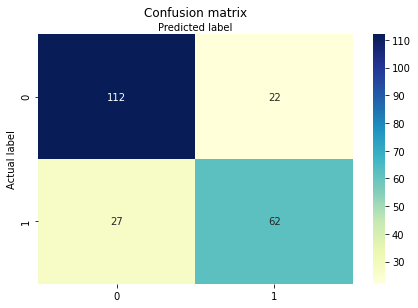

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7802690582959642
Precision: 0.7380952380952381
Recall: 0.6966292134831461


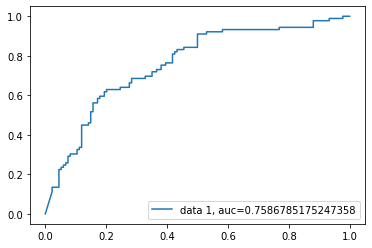

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()